## 1. Libraries & Data

In [22]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt     
%matplotlib inline 
import seaborn as sns

In [23]:
bankdata = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [24]:
bankdata.head() 

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [25]:
## Data Type
bankdata.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

Most data type are integer apart from CCAvg, which is float

In [26]:
## Statistical Summary
bankdata.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [27]:
bankdata.skew()

ID                     0.000000
Age                   -0.029341
Experience            -0.026325
Income                 0.841339
ZIP Code             -12.500221
Family                 0.155221
CCAvg                  1.598443
Education              0.227093
Mortgage               2.104002
Personal Loan          2.743607
Securities Account     2.588268
CD Account             3.691714
Online                -0.394785
CreditCard             0.904589
dtype: float64

In [28]:
## Shape  
bankdata.shape

(5000, 14)

In [29]:
##checking for null
bankdata.isnull().values.any()

False

In [30]:
##check for incorrect imputation 
realno = lambda x:np.isreal(x)
bankdata.apply(realno).count()


ID                    5000
Age                   5000
Experience            5000
Income                5000
ZIP Code              5000
Family                5000
CCAvg                 5000
Education             5000
Mortgage              5000
Personal Loan         5000
Securities Account    5000
CD Account            5000
Online                5000
CreditCard            5000
dtype: int64

In [31]:
neg_n = lambda x:x<0
for (col,coldata) in bankdata.items():
    if (bankdata[col].apply(neg_n).any()):
        print(col)

Experience


In [32]:
bankdata['Experience'] = bankdata['Experience'].abs()

In [33]:
bankdata[bankdata['Experience']<0]['Experience'].any()

False

## 2. EDA

In [34]:
##Number of unique item on each column
for x in bankdata.columns:
  print(x,len(bankdata[x].unique().tolist()))

ID 5000
Age 45
Experience 44
Income 162
ZIP Code 467
Family 4
CCAvg 108
Education 3
Mortgage 347
Personal Loan 2
Securities Account 2
CD Account 2
Online 2
CreditCard 2


In [35]:
## Number of people with zero Mortgage
zero_m = lambda x:x==0
bankdata[bankdata['Mortgage'].apply(zero_m)]['Mortgage'].count()

3462

In [36]:
## Number of people with zero credit card spending per month 
zero_s = lambda x:x==0
bankdata[bankdata['CCAvg'].apply(zero_s)]['CCAvg'].count()

106

In [37]:
## Value count for all categorical columns. We first need to change those columns to categorical data types
bankdata['Education'] = bankdata['Education'].astype('category')
bankdata['Personal Loan'] = bankdata['Personal Loan'].astype('category')
bankdata['Securities Account'] = bankdata['Securities Account'].astype('category')
bankdata['CD Account'] = bankdata['CD Account'].astype('category')
bankdata['Online'] = bankdata['Online'].astype('category')
bankdata['CreditCard'] = bankdata['CreditCard'].astype('category')
bankdata.dtypes

ID                       int64
Age                      int64
Experience               int64
Income                   int64
ZIP Code                 int64
Family                   int64
CCAvg                  float64
Education             category
Mortgage                 int64
Personal Loan         category
Securities Account    category
CD Account            category
Online                category
CreditCard            category
dtype: object

In [38]:
## so value counts for all categorical columns are:
for x in bankdata.columns:
    if bankdata[x].dtype.name == "category":
        print(bankdata[x].value_counts())

1    2096
3    1501
2    1403
Name: Education, dtype: int64
0    4520
1     480
Name: Personal Loan, dtype: int64
0    4478
1     522
Name: Securities Account, dtype: int64
0    4698
1     302
Name: CD Account, dtype: int64
1    2984
0    2016
Name: Online, dtype: int64
0    3530
1    1470
Name: CreditCard, dtype: int64


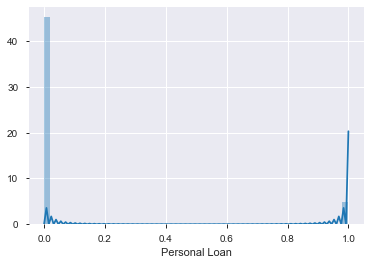

In [39]:
## Univariate and Bivariate Plots
sns.distplot(bankdata['Personal Loan'])

Many of the participant at the last campaign did not respond positively to it

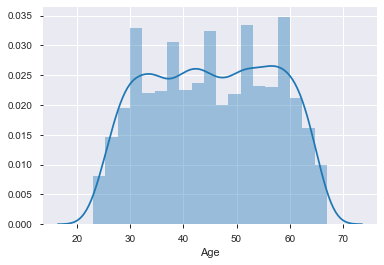

In [40]:
sns.distplot(bankdata['Age'])

Most of the people that participated in the last campaign were between 30 and 60 

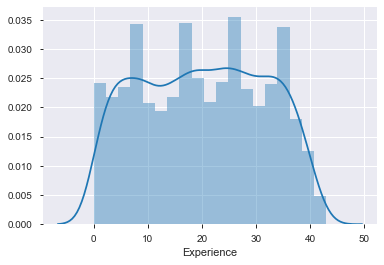

In [41]:
sns.distplot(bankdata['Experience'])

From the graph it seems experience and age are somehow related and experience of participants were between 0 and 45

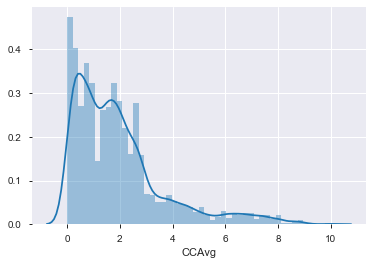

In [42]:
sns.distplot(bankdata['CCAvg'])

Average spending for most participant was zero

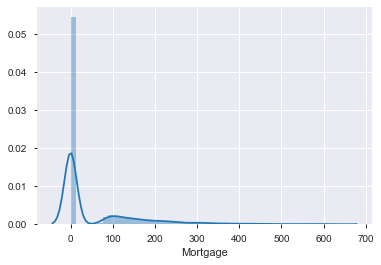

In [43]:
sns.distplot(bankdata['Mortgage'])

Value of mortgage for majority was zero

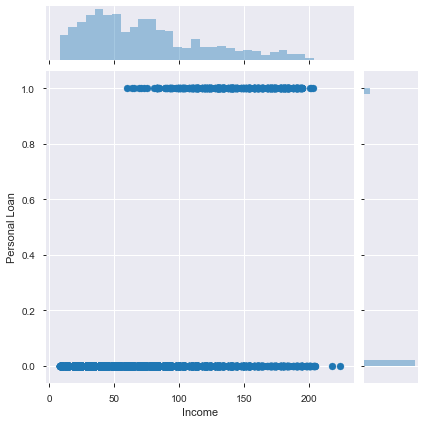

In [44]:
sns.jointplot(bankdata['Income'],bankdata['Personal Loan'])

Income for those that responded positively was between $60,000 and $200,000 with some outliers 

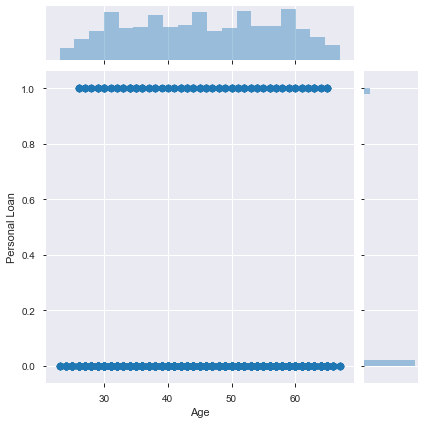

In [45]:
sns.jointplot(bankdata['Age'],bankdata['Personal Loan'])

People with Age between 25 and 65 responded positively

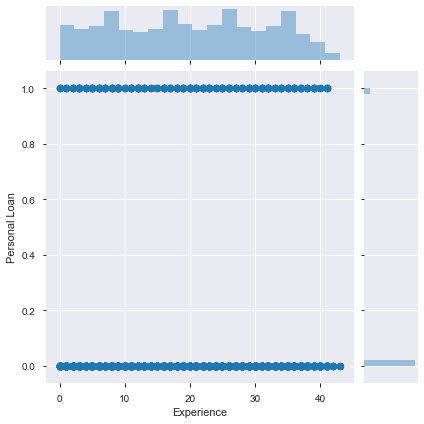

In [46]:
sns.jointplot(bankdata['Experience'],bankdata['Personal Loan'])

Positive correspondence have zero to 45 years of experience. 

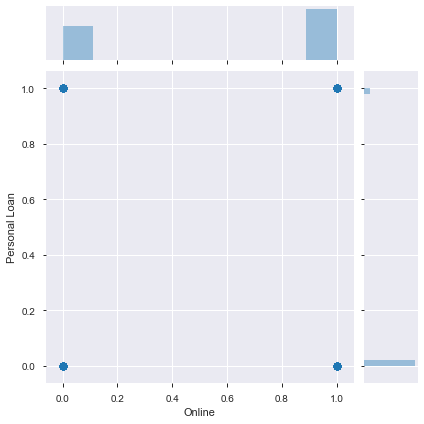

In [47]:
sns.jointplot(bankdata['Online'], bankdata['Personal Loan'])

Most people that responded positively also had online banking

ID       Age  Experience    Income  ZIP Code    Family  \
ID          1.000000 -0.008473   -0.008202 -0.017695  0.013432 -0.016797   
Age        -0.008473  1.000000    0.993991 -0.055269 -0.029216 -0.046418   
Experience -0.008202  0.993991    1.000000 -0.046876 -0.028936 -0.051851   
Income     -0.017695 -0.055269   -0.046876  1.000000 -0.016410 -0.157501   
ZIP Code    0.013432 -0.029216   -0.028936 -0.016410  1.000000  0.011778   
Family     -0.016797 -0.046418   -0.051851 -0.157501  0.011778  1.000000   
CCAvg      -0.024675 -0.052012   -0.049738  0.645984 -0.004061 -0.109275   
Mortgage   -0.013920 -0.012539   -0.011097  0.206806  0.007383 -0.020445   

               CCAvg  Mortgage  
ID         -0.024675 -0.013920  
Age        -0.052012 -0.012539  
Experience -0.049738 -0.011097  
Income      0.645984  0.206806  
ZIP Code   -0.004061  0.007383  
Family     -0.109275 -0.020445  
CCAvg       1.000000  0.109905  
Mortgage    0.109905  1.000000  


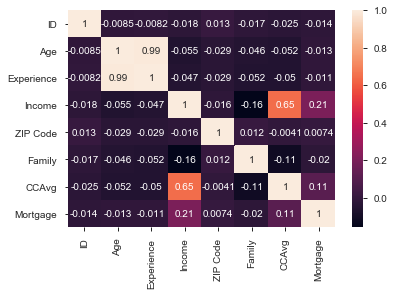

In [48]:
print(bankdata.corr())
sns.heatmap(bankdata.corr(),annot=True)

Heatmap shows strong positive correllation between age and Experience. In addition, average spending on credit card positively correlate with Income

In [49]:
##EDA using pandas profiling
from  pandas_profiling import ProfileReport
rep = ProfileReport(bankdata)
rep.to_file('bankdata.html')

Using Pandas profiling also shows the correlations mentioned above and also reflect many zeros in CCAvg,Experience and Mortgage

## 3. Build Model

In [76]:
#ID and ZIP Codes can be dropped as they are not going to add value to the model
bankdata2 = bankdata.drop(['ID'], axis=1)
bankdata2 = bankdata.drop(['ZIP_Code'], axis=1)

In [77]:
#Age can also be dropped since it is highly correlated with Experience
bankdata2 = bankdata2.drop('Age', axis=1)

In [78]:
bankdata2.head()

,ID,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,1,49,4,1.6,1,0,0,1,0,0,0
1,2,19,34,3,1.5,1,0,0,1,0,0,0
2,3,15,11,1,1.0,1,0,0,0,0,0,0
3,4,9,100,1,2.7,2,0,0,0,0,0,0
4,5,8,45,4,1.0,2,0,0,0,0,0,1


In [80]:
#Replace the columns with many zeros with their mean
bankdata2['CCAvg'] = bankdata2['CCAvg'].replace(0,bankdata2['CCAvg'].mean())
bankdata2['Experience'] = bankdata2['Experience'].replace(0,bankdata2['Experience'].mean())
bankdata2['Mortgage'] = bankdata2['Mortgage'].replace(0,bankdata2['Mortgage'].mean())

In [81]:
bankdata2.head()

,ID,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,1.0,49,4,1.6,1,56.4988,0,1,0,0,0
1,2,19.0,34,3,1.5,1,56.4988,0,1,0,0,0
2,3,15.0,11,1,1.0,1,56.4988,0,0,0,0,0
3,4,9.0,100,1,2.7,2,56.4988,0,0,0,0,0
4,5,8.0,45,4,1.0,2,56.4988,0,0,0,0,1


In [84]:
#splitting of the data to dependent and independent variables 
X = bankdata2[['Experience','Income','Family','CCAvg','Education','Mortgage','Securities_Account','CD_Account','Online','CreditCard']]
y = bankdata2['Personal_Loan']

In [85]:
#One hot encoding
X = pd.get_dummies(X, drop_first=True)

In [57]:
sns.pairplot()

TypeError: pairplot() missing 1 required positional argument: 'data'

In [86]:
##Splitting the data for training and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)
X_train.head()

,Experience,Income,Family,CCAvg,Mortgage,Education_2,Education_3,Securities_Account_1,CD_Account_1,Online_1,CreditCard_1
3465,41.0,42,1,1.9,56.4988,1,0,0,0,0,0
4582,1.0,69,3,0.3,56.4988,0,1,0,0,1,0
1922,15.0,25,1,1.4,56.4988,0,1,0,0,0,0
1186,38.0,43,4,1.2,56.4988,1,0,0,0,1,0
3718,19.0,8,2,0.1,56.4988,0,1,0,0,0,1


In [87]:
#feature scaling
from sklearn import preprocessing
X_cols = X.columns
X_train = pd.DataFrame(preprocessing.scale(X_train))
X_test = pd.DataFrame(preprocessing.scale(X_test))
X_train.columns = X_cols
X_test.columns = X_cols

## 4. Prediction with Logistic Regression

In [88]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

#fit model
b_model = LogisticRegression()
b_model.fit(X_train,y_train)

#prediction 
y_predict = b_model.predict(X_test)

#print coef and intercept
b_model_para = pd.DataFrame(b_model.coef_)
b_model_para['Intercept'] = b_model.intercept_
print(b_model_para)



0       1         2         3         4         5         6  \
0  0.166858  2.8142  0.637354  0.173712  0.083144  1.777411  1.841365   

         7         8         9        10  Intercept  
0 -0.27449  0.828572 -0.317634 -0.436632  -4.940537  


In [89]:
#print model score
b_model_score = b_model.score(X_test,y_test)
print(b_model_score)

0.9566666666666667


[[  94   50]
 [  15 1341]]


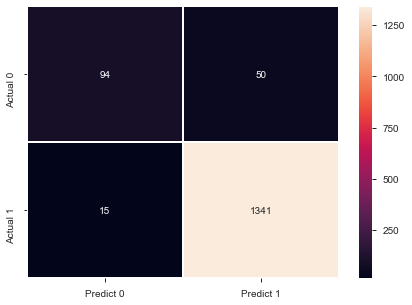

In [90]:
con_met=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])
print(con_met)
df_con_met = pd.DataFrame(con_met, index = [i for i in ["Actual 0","Actual 1"]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_con_met,annot=True,linewidths=1, fmt = 'd')


In [91]:
TN = con_met[0][0]
FP = con_met[0][1]
FN = con_met[1][0]
TP = con_met[1][1]

print('The confusion matrix...')
print('True Positives (TP) =',TP)
print('False Positives (FP) =',FP)
print('False Negatives (FN)=',FN)
print('True Negatives (TN) =',TN)

The confusion matrix...
True Positives (TP) = 1341
False Positives (FP) = 50
False Negatives (FN)= 15
True Negatives (TN) = 94


In [64]:
Accuracy = (TP + TN)/(TP + TN + FP + FN)
Recall = (TP) / (TP + FN)
Precision = (TP)/(TP + FP)
Error_rate = (FP + FN)/(TP + TN + FP + FN)
Specificity = (TN)/(TN + FP)
from sklearn.metrics import roc_auc_score
f1 = (2*Precision*Recall)/(Precision + Recall)
print('Accuracy =', Accuracy)
print('Recall/TPR/Sensitivity =',Recall)
print('Precision =', Precision)
print('Error Rate =',Error_rate)
print('Specificity/TNR = ',Specificity)
print('FPR =',1 - Specificity)
print('ROC_AUC Score =', roc_auc_score(y_test,y_predict))
print('F1 =', f1)

NameError: name 'TP' is not defined

## 5. Improve the performance of the model

In [65]:
# Use GridSearchCV/RandomizedSearchCV to determine the best parameters that will make the model perform the best

from sklearn.model_selection import GridSearchCV
GS_for_model = GridSearchCV(LogisticRegression(),{'C':[1,5,10],'penalty':['l1','l2']},cv=10,return_train_score=False)

from sklearn.model_selection import RandomizedSearchCV
RS_for_model = RandomizedSearchCV(LogisticRegression(),{'C':[1,5,10],'penalty':['l1','l2']},cv=10,return_train_score=False,n_iter=10)

GS_for_model.fit(X_train,y_train)
print('GridSearchCV Best Score =', GS_for_model.best_score_)
print('GridSearchCV Best Parameters =', GS_for_model.best_params_)

RS_for_model.fit(X_train,y_train)
print('RandomizedSearchCV Best Score =', RS_for_model.best_score_)
print('RandomizedSearchCV Best Parameters =', RS_for_model.best_params_)



NameError: name 'X_train' is not defined

Same result from both. Best parameters(C=1,penalty='l1')

In [66]:
#To check how best model perform
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

#fit best model
best_model = LogisticRegression(C=1,penalty='l1')
best_model.fit(X_train,y_train)

#prediction 
y_best_predict = best_model.predict(X_test)

#print coef and intercept,
best_model_para = pd.DataFrame(best_model.coef_)
best_model_para['Intercept'] = best_model.intercept_
print(best_model_para)

NameError: name 'X_train' is not defined

In [67]:
#print best model score
best_model_score = best_model.score(X_test,y_test)
print(best_model_score)

NameError: name 'X_test' is not defined

In [68]:
#best model confusion matrix and heatmap
best_con_met=metrics.confusion_matrix(y_test, y_best_predict, labels=[1, 0])
print(best_con_met)
df_best_con_met = pd.DataFrame(best_con_met, index = [i for i in ["Actual 0","Actual 1"]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_best_con_met,annot=True,linewidths=1, fmt = 'd')

NameError: name 'y_test' is not defined

In [69]:
TN = best_con_met[0][0]
FP = best_con_met[0][1]
FN = best_con_met[1][0]
TP = best_con_met[1][1]

print('The confusion matrix...')
print('True Positives (TP) =',TP)
print('False Positives (FP) =',FP)
print('False Negatives (FN)=',FN)
print('True Negatives (TN) =',TN)

NameError: name 'best_con_met' is not defined

In [70]:
Accuracy = (TP + TN)/(TP + TN + FP + FN)
Recall = (TP) / (TP + FN)
Precision = (TP)/(TP + FP)
Error_rate = (FP + FN)/(TP + TN + FP + FN)
Specificity = (TN)/(TN + FP)
from sklearn.metrics import roc_auc_score
f1 = (2*Precision*Recall)/(Precision + Recall)
print('Accuracy =', Accuracy)
print('Recall/TPR/Sensitivity =',Recall)
print('Precision =', Precision)
print('Error Rate =',Error_rate)
print('Specificity/TNR = ',Specificity)
print('FPR =',1 - Specificity)
print('ROC_AUC Score =', roc_auc_score(y_test,y_predict))
print('F1 =', f1)

NameError: name 'TP' is not defined

Therefore the parameters(C=1, penalty='l1') and default parameters(C=1, penalty='l2') used by default gave same result. Meaning the initial model was also the best.

## 6. Business Implication 

Since the campaign is to attract existing customers with deposit in the bank to take loans. Communicating this to customers that may not take the loan is not an issue. If the customers get the loan request offer from the bank and they are not willing to take the offer, they will just ignore the message, so no implication. Consequently, having many false positives in this case is not an issue. However, many false negatives will result into many loss opportunitues for the bank. So our goal should be to minimize false negatives and thus favour Recall as a performance measure over precision. Fortunately, both model(initial and the best), favour Recall over Precision. So we can adopt the best model above for the campaign. 

In [71]:
best_model.get_params

<bound method BaseEstimator.get_params of LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)>

In [72]:
best_model_para

NameError: name 'best_model_para' is not defined

In [73]:
best_model.predict_proba

<bound method LogisticRegression.predict_proba of LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)>

In [74]:
b_model.predict_proba

<bound method LogisticRegression.predict_proba of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)>